<a href="https://colab.research.google.com/github/duchaba/python_simplified_with_genai/blob/master/Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flowchart

In [1]:
!pip install graphviz

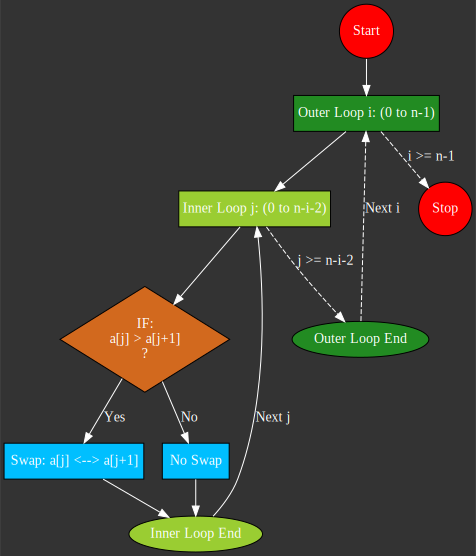

In [2]:
# Prompt GPT:
# Write graphviz code to display the bubble sort algorithm

from graphviz import Digraph

# Create a directed graph
dot = Digraph(engine='dot')

# Set graph attributes for a dark gray background and white text
dot.attr(bgcolor="gray20")
dot.attr(fontcolor="white")

# Add nodes with individual web colors, white text, and custom shapes
dot.node("Start", "Start", style="filled", fillcolor="red", fontcolor="white", shape="circle")
dot.node("OuterLoop", "Outer Loop i: (0 to n-1)", style="filled", fillcolor="forestgreen", fontcolor="white", shape="box")
dot.node("InnerLoop", "Inner Loop j: (0 to n-i-2)", style="filled", fillcolor="yellowgreen", fontcolor="white", shape="box")
dot.node("Compare", "IF:\na[j] > a[j+1]\n?", style="filled", fillcolor="chocolate", fontcolor="white", shape="diamond")
dot.node("Swap", "Swap: a[j] <--> a[j+1]", style="filled", fillcolor="deepskyblue", fontcolor="white", shape="box")
dot.node("NoSwap", "No Swap", style="filled", fillcolor="deepskyblue", fontcolor="white", shape="box")
dot.node("EndInner", "Inner Loop End", style="filled", fillcolor="yellowgreen", fontcolor="white", shape="ellipse")
dot.node("EndOuter", "Outer Loop End", style="filled", fillcolor="forestgreen", fontcolor="white", shape="ellipse")
dot.node("Finish", "Stop", style="filled", fillcolor="red", fontcolor="white", shape="circle")

# Add edges with web colors and white text
dot.edge("Start", "OuterLoop", color="white", fontcolor="white")
dot.edge("OuterLoop", "InnerLoop", color="white", fontcolor="white")
dot.edge("InnerLoop", "Compare", color="white", fontcolor="white")
dot.edge("Compare", "Swap", label="Yes", color="white", fontcolor="white")
dot.edge("Compare", "NoSwap", label="No", color="white", fontcolor="white")
dot.edge("Swap", "EndInner", color="white", fontcolor="white")
dot.edge("NoSwap", "EndInner", color="white", fontcolor="white")
dot.edge("EndInner", "InnerLoop", label="Next j", color="white", fontcolor="white")
dot.edge("InnerLoop", "EndOuter", label="j >= n-i-2", style="dashed", color="white", fontcolor="white")
dot.edge("EndOuter", "OuterLoop", label="Next i", style="dashed", color="white", fontcolor="white")
dot.edge("OuterLoop", "Finish", label="i >= n-1", style="dashed", color="white", fontcolor="white")

# Render and display the flowchart
dot.render("bubble_sort_flowchart", format="png", cleanup=True)  # Save as PNG
dot  # Display inline in Jupyter Notebook


Express Bubble Sort's logic compactly in a mathematical-style pseudo-formula:

$$
Repeat\ (\eta-\kappa)\ times\ for\ each\ \kappa\:∈ [1,\eta]:\\
If\ a[i]>a[i+1]: Swap\ a[i]\ and\ a[i+1]
$$

# bubble sort

In [5]:
# prompt GPT:
# Write a simple Bubble Sort function in Python with inline documentation

def bubble_sort(input_list, is_debug=True):
  """Sorts a list using the bubble sort algorithm.

  Args:
      input_list: The list to be sorted.

  Returns:
      list: The sorted list.
  """
  n = len(input_list)  # Get the length of the list (array)

  # debug statement
  if (is_debug):
    print(f"Debug log: Length of the input list is: {n}")

  # Traverse through all element in the list
  # outer loop
  for i in range(n):

    # Flag to optimize - if no swaps occur, the list is sorted
    swapped = False

    # debug statement
    if (is_debug):
      print(f"Debug log: Pass {i}: {' '*11}{input_list}")

    # inner loop
    for j in range(0, n - i - 1):
      if input_list[j] > input_list[j + 1]:    # check for swapping
        input_list[j], input_list[j + 1] = input_list[j + 1], input_list[j]
        swapped = True
    if not swapped:
      break  # If no two elements were swapped in inner loop, the array is sorted
  return input_list

In [14]:
# check bubble sort, inner loop debug

unorder_list = [5, 3, 8, 6, 2]
order_list = bubble_sort(unorder_list)
print(f"Output order list: {' '*11}{order_list}")

Debug log: Length of the input list is: 5
Debug log: Pass 0:            [5, 3, 8, 6, 2]
Debug log: Pass 1:            [3, 5, 6, 2, 8]
Debug log: Pass 2:            [3, 5, 2, 6, 8]
Debug log: Pass 3:            [3, 2, 5, 6, 8]
Debug log: Pass 4:            [2, 3, 5, 6, 8]
Output order list:            [2, 3, 5, 6, 8]


In [10]:
# Bubble sort and swapped flag

unorder_list = [5, 2, 8, 6, 3]
order_list = bubble_sort(unorder_list)
print(f"Output order list: {' '*11}{order_list}")

Debug log: Length of the input list is: 5
Debug log: Pass 0:            [5, 2, 8, 6, 3]
Debug log: Pass 1:            [2, 5, 6, 3, 8]
Debug log: Pass 2:            [2, 5, 3, 6, 8]
Debug log: Pass 3:            [2, 3, 5, 6, 8]
Output order list:            [2, 3, 5, 6, 8]


In [12]:
# Bubble sort and swapped flag 2

unorder_list = [8, 2, 3, 5, 6]
order_list = bubble_sort(unorder_list)
print(f"Output order list: {' '*11}{order_list}")

Debug log: Length of the input list is: 5
Debug log: Pass 0:            [8, 2, 3, 5, 6]
Debug log: Pass 1:            [2, 3, 5, 6, 8]
Output order list:            [2, 3, 5, 6, 8]


# bar chart bubble sort

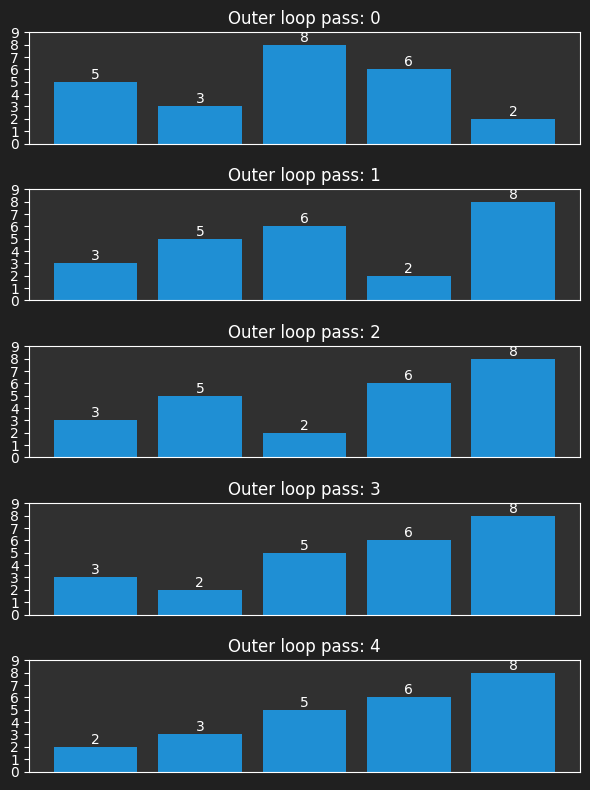

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bubble_sort(array, steps, color="deepskyblue"):
    """
    Visualize bubble sort process step by step using matplotlib.
    """
    fig, axes = plt.subplots(len(steps), 1, figsize=(6, int(len(steps)*1.6)))

    for i, step in enumerate(steps):
        axes[i].bar(range(len(array)), step, color=color, alpha=0.85)
        axes[i].set_title(f"Outer loop pass: {i}", color='white')
        #axes[i].set_xticks(range(len(array)))
        axes[i].set_xticks([]) # Remove x-axis ticks
        axes[i].set_yticks(range(max(array) + 2))
        #
        axes[i].set_facecolor("#303030") #set background color to black
        axes[i].tick_params(axis='x', colors='white')  # Set x-axis tick color to white
        axes[i].tick_params(axis='y', colors='white')  # Set y-axis tick color to white
        axes[i].spines['bottom'].set_color('white')
        axes[i].spines['top'].set_color('white')
        axes[i].spines['right'].set_color('white')
        axes[i].spines['left'].set_color('white')
        #
        for j, value in enumerate(step):
            axes[i].text(j, value, str(value), ha='center', va='bottom', color='white')
        #
    fig.patch.set_facecolor('#202020') # Set the figure's background color to black
    plt.tight_layout()
    plt.show()

# prompt GPT:
# Write a simple Bubble Sort function in Python with inline documentation

def bubble_sort_2(input_list):
  """Sorts a list using the bubble sort algorithm.

  Args:
      input_list: The list to be sorted.

  Returns:
      list: The sorted list.
  """
  n = len(input_list)  # Get the length of the list (array)

  # debug statement
  #print(f"Debug log: Length of the input list is: {n}")

  outer_steps = []
  # Traverse through all element in the list
  # outer loop
  for i in range(n):

    # Flag to optimize - if no swaps occur, the list is sorted
    swapped = False

    # debug statement
    #print(f"Debug log: Pass {i}: {' '*11}{input_list}")
    outer_steps.append(input_list.copy())

    # inner loop
    for j in range(0, n - i - 1):
      if input_list[j] > input_list[j + 1]:    # check for swapping
        input_list[j], input_list[j + 1] = input_list[j + 1], input_list[j]

        # debug statement
        #print(f"Debug log: Inner loop pass {j}: {input_list}")
        swapped = True
    if not swapped:
      break  # If no two elements were swapped in inner loop, the array is sorted
  return outer_steps

# Initial array
unorder_list = [5, 3, 8, 6, 2]

# Get the steps of bubble sort
steps = bubble_sort_2(unorder_list.copy())

# Plot the steps
plot_bubble_sort(unorder_list, steps, color="#1DA1F2")

#


In [ ]:
print (steps)


[[5, 3, 8, 6, 2], [3, 5, 6, 2, 8], [3, 5, 2, 6, 8], [3, 2, 5, 6, 8], [2, 3, 5, 6, 8]]


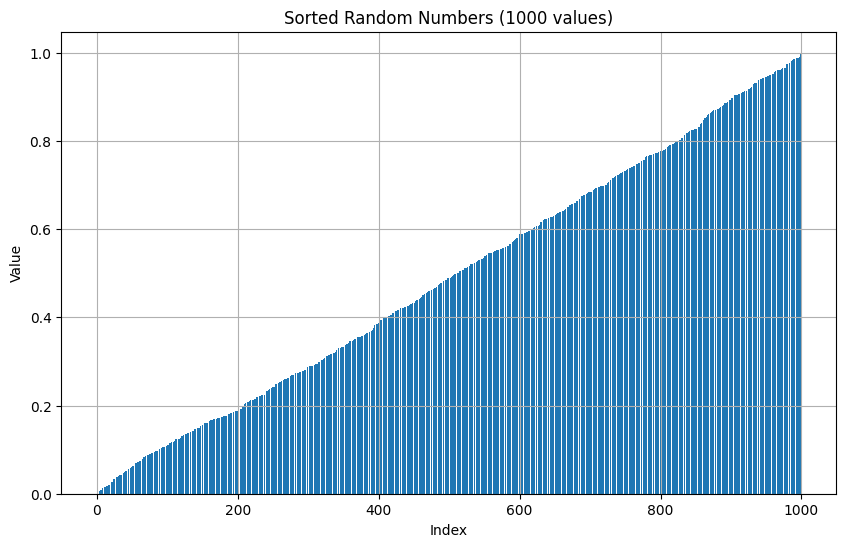

In [ ]:
# prompt: draw a chart for 1000 value of random number that is ordered

import matplotlib.pyplot as plt
import numpy as np

# Generate 1000 random numbers and sort them
random_numbers = np.random.rand(1000)
sorted_numbers = np.sort(random_numbers)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_numbers)), sorted_numbers)
plt.title("Sorted Random Numbers (1000 values)")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

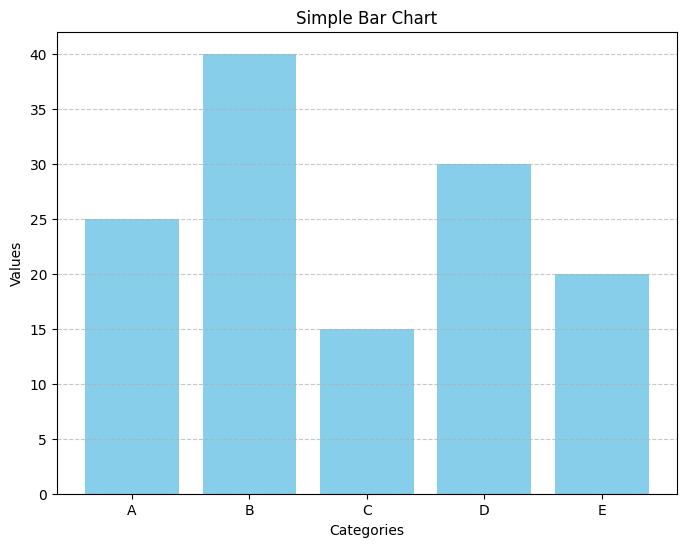

In [ ]:
# prompt: draw a simple bar chart with just value no categories

import matplotlib.pyplot as plt
import numpy as np

# Generate 1000 random numbers and sort them
random_numbers = np.random.rand(1000)
sorted_numbers = np.sort(random_numbers)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_numbers)), sorted_numbers)
plt.title("Sorted Random Numbers (1000 values)")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [ ]:
# prompt: don't display the x value

def plot_bubble_sort(array, steps, color="deepskyblue"):
    """
    Visualize bubble sort process step by step using matplotlib.
    """
    fig, axes = plt.subplots(len(steps), 1, figsize=(6, int(len(steps)*2)))

    for i, step in enumerate(steps):
        axes[i].bar(range(len(array)), step, color=color, alpha=0.85)
        axes[i].set_title(f"Pass: {i}", color='white')
        axes[i].set_xticks([]) # Remove x-axis ticks
        axes[i].set_yticks(range(max(array) + 1))
        #
        axes[i].set_facecolor("#303030") #set background color to black
        axes[i].tick_params(axis='y', colors='white')  # Set y-axis tick color to white
        axes[i].spines['bottom'].set_color('white')
        axes[i].spines['top'].set_color('white')
        axes[i].spines['right'].set_color('white')
        axes[i].spines['left'].set_color('white')
        #
        for j, value in enumerate(step):
            axes[i].text(j, value, str(value), ha='center', va='bottom', color='white')
        #
    fig.patch.set_facecolor('#202020') # Set the figure's background color to black
    plt.tight_layout()
    plt.show()

In [ ]:
# Recreating the flowchart for Selection Sort with corrected structure
from graphviz import Digraph

# Create a directed graph for Selection Sort
dot = Digraph(comment="Flowchart for Selection Sort", format="png")

# Add nodes
dot.node("Start", "Start", shape="circle", style="filled", fillcolor="lightblue")
dot.node("Outer Loop", "Outer Loop: i = 0 to n-2", shape="box")
dot.node("Set Min", "Set min_idx = i", shape="box")
dot.node("Inner Loop", "Inner Loop: j = i+1 to n-1", shape="box")
dot.node("Compare", "Compare arr[j] < arr[min_idx]?", shape="diamond")
dot.node("Update Min", "Update min_idx = j", shape="box")
dot.node("Swap", "Swap arr[i] and arr[min_idx]", shape="box")
dot.node("Next i", "Increment i", shape="box")
dot.node("End", "End", shape="circle", style="filled", fillcolor="lightgreen")

# Add edges to show flow
dot.edge("Start", "Outer Loop")
dot.edge("Outer Loop", "Set Min")
dot.edge("Set Min", "Inner Loop")
dot.edge("Inner Loop", "Compare")
dot.edge("Compare", "Update Min", label="Yes")
dot.edge("Compare", "Inner Loop", label="No")
dot.edge("Update Min", "Inner Loop")
dot.edge("Inner Loop", "Swap", constraint="false")
dot.edge("Swap", "Next i")
dot.edge("Next i", "Outer Loop", label="i < n-2", constraint="false")
dot.edge("Outer Loop", "End", label="i = n-2")

# Render the flowchart
file_path = dot.render("corrected_selection_sort_flowchart", cleanup=True)

# Display the output file path
file_path


'corrected_selection_sort_flowchart.png'

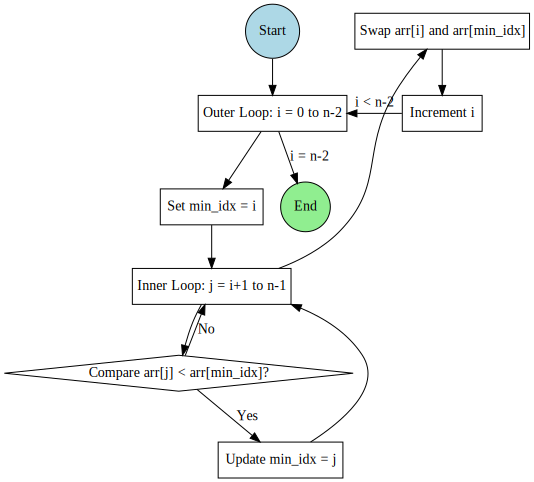

In [ ]:
display(dot)

# Selection sort

In [16]:
# prompt GPT:
# Write a Python function with documentation for the selection sort

def selection_sort(input_list, is_debug=True):
  """
  Sorts a list using the selection sort algorithm.

  Args:
      input_list: The list to be sorted.

  Returns:
      The sorted list.
  """
  n = len(input_list)
  for i in range(n):
      # Find the minimum element in the unsorted part of the array

      # Debug log
      if (is_debug):
        print(f"Debug log: Pass {i}: {' '*26}{input_list}")

      min_idx = i
      for j in range(i + 1, n):
        if input_list[j] < input_list[min_idx]:
          min_idx = j

          # Debug log
          if (is_debug):
            print(f"Debug log: Inner loop pass {j}: Smaller found: {input_list[min_idx]}")

      # Swap the found minimum element with the first element of the unsorted part
      input_list[i], input_list[min_idx] = input_list[min_idx], input_list[i]
  return input_list

In [17]:
# Testing selection sort

unorder_list = [5, 3, 8, 6, 2]
sorted_list = selection_sort(unorder_list)
print(f'Output ordered list: {" "*24}{sorted_list}')

Debug log: Pass 0:                           [5, 3, 8, 6, 2]
Debug log: Inner loop pass 1: Smaller found: 3
Debug log: Inner loop pass 4: Smaller found: 2
Debug log: Pass 1:                           [2, 3, 8, 6, 5]
Debug log: Pass 2:                           [2, 3, 8, 6, 5]
Debug log: Inner loop pass 3: Smaller found: 6
Debug log: Inner loop pass 4: Smaller found: 5
Debug log: Pass 3:                           [2, 3, 5, 6, 8]
Debug log: Pass 4:                           [2, 3, 5, 6, 8]
Output ordered list:                         [2, 3, 5, 6, 8]


In [18]:
# Testing selection sort, use case 2

unorder_list = [8, 6, 3, 2, 5]
sorted_list = selection_sort(unorder_list)
print(f'Output ordered list: {" "*24}{sorted_list}')

Debug log: Pass 0:                           [8, 6, 3, 2, 5]
Debug log: Inner loop pass 1: Smaller found: 6
Debug log: Inner loop pass 2: Smaller found: 3
Debug log: Inner loop pass 3: Smaller found: 2
Debug log: Pass 1:                           [2, 6, 3, 8, 5]
Debug log: Inner loop pass 2: Smaller found: 3
Debug log: Pass 2:                           [2, 3, 6, 8, 5]
Debug log: Inner loop pass 4: Smaller found: 5
Debug log: Pass 3:                           [2, 3, 5, 8, 6]
Debug log: Inner loop pass 4: Smaller found: 6
Debug log: Pass 4:                           [2, 3, 5, 6, 8]
Output ordered list:                         [2, 3, 5, 6, 8]


# Insertion sort

In [19]:
# prompt: write a function with documentation for the insertion sort

def insertion_sort(input_list, is_debug=True):
  """Sorts a list using the insertion sort algorithm.

  Args:
    arr: The list to be sorted.

  Returns:
    The sorted list.
  """
  for i in range(1, len(input_list)):

    # Debug log outer loop
    if (is_debug):
      print(f'Debug log: Pass {i}: {" "*11}{input_list}')

    key = input_list[i]
    j = i - 1

    while j >= 0 and key < input_list[j]:
      input_list[j + 1] = input_list[j]
      j -= 1
      # Debug log
      if (is_debug):
        print(f"Debug log: Inner loop pass {j}: {input_list}")

    input_list[j + 1] = key

  return input_list

In [20]:
# Testing insertion sort

unorder_list = [5, 3, 8, 6, 2]
sorted_list = insertion_sort(unorder_list)
print(f'Output ordered list: {" "*9}{sorted_list}')

Debug log: Pass 1:            [5, 3, 8, 6, 2]
Debug log: Inner loop pass -1: [5, 5, 8, 6, 2]
Debug log: Pass 2:            [3, 5, 8, 6, 2]
Debug log: Pass 3:            [3, 5, 8, 6, 2]
Debug log: Inner loop pass 1: [3, 5, 8, 8, 2]
Debug log: Pass 4:            [3, 5, 6, 8, 2]
Debug log: Inner loop pass 2: [3, 5, 6, 8, 8]
Debug log: Inner loop pass 1: [3, 5, 6, 6, 8]
Debug log: Inner loop pass 0: [3, 5, 5, 6, 8]
Debug log: Inner loop pass -1: [3, 3, 5, 6, 8]
Output ordered list:          [2, 3, 5, 6, 8]


In [21]:
# Testing insertion sort, use case 2

unorder_list = [8, 6, 3, 2, 5]
sorted_list = insertion_sort(unorder_list)
print(f'Output ordered list: {" "*9}{sorted_list}')

Debug log: Pass 1:            [8, 6, 3, 2, 5]
Debug log: Inner loop pass -1: [8, 8, 3, 2, 5]
Debug log: Pass 2:            [6, 8, 3, 2, 5]
Debug log: Inner loop pass 0: [6, 8, 8, 2, 5]
Debug log: Inner loop pass -1: [6, 6, 8, 2, 5]
Debug log: Pass 3:            [3, 6, 8, 2, 5]
Debug log: Inner loop pass 1: [3, 6, 8, 8, 5]
Debug log: Inner loop pass 0: [3, 6, 6, 8, 5]
Debug log: Inner loop pass -1: [3, 3, 6, 8, 5]
Debug log: Pass 4:            [2, 3, 6, 8, 5]
Debug log: Inner loop pass 2: [2, 3, 6, 8, 8]
Debug log: Inner loop pass 1: [2, 3, 6, 6, 8]
Output ordered list:          [2, 3, 5, 6, 8]


### version 2

In [22]:
# prompt GPT4:
# Write a function with documentation for the insertion sort

def insertion_sort(input_list, is_debug=False):
    """
    Sorts an array using the insertion sort algorithm.

    Parameters:
    arr (list): The list of elements to be sorted.

    Returns:
    list: The same list with elements sorted in ascending order.

    Time Complexity:
    - Best Case: O(n) (when the array is already sorted)
    - Worst Case: O(n^2) (when the array is sorted in reverse order)
    """
    # Debug log
    if (is_debug):
      print(f"\nDebug log: Input list: {' '*22}{input_list}")

    n = len(input_list)
    for i in range(1, len(input_list)):
        key = input_list[i]
        j = i - 1

        # Debug log
        if (is_debug):
          print(f"\nDebug log: Outer loop at index {i}: {' '*11}{key}")
        # Check greater than key to one position ahead
        while j >= 0 and input_list[j] > key:

            # Debug log
            if (is_debug):
              print(f"Debug log: Inner loop at index {j}: {' '*11}{input_list[j]} ")

            input_list[j + 1] = input_list[j]
            j -= 1

        input_list[j + 1] = key

        # Debug log
        if (is_debug):
          print(f"Debug log: Outer loop inserted {key} at index {j + 1}: {input_list}")
    return input_list


In [23]:
# Sample run insertion sort

unorder_list = [5, 3, 8, 6, 2]
sorted_list = insertion_sort(unorder_list, is_debug=True)
print(f"Output ordered list: {' '*24}{sorted_list}")


Debug log: Input list:                       [5, 3, 8, 6, 2]

Debug log: Outer loop at index 1:            3
Debug log: Inner loop at index 0:            5 
Debug log: Outer loop inserted 3 at index 0: [3, 5, 8, 6, 2]

Debug log: Outer loop at index 2:            8
Debug log: Outer loop inserted 8 at index 2: [3, 5, 8, 6, 2]

Debug log: Outer loop at index 3:            6
Debug log: Inner loop at index 2:            8 
Debug log: Outer loop inserted 6 at index 2: [3, 5, 6, 8, 2]

Debug log: Outer loop at index 4:            2
Debug log: Inner loop at index 3:            8 
Debug log: Inner loop at index 2:            6 
Debug log: Inner loop at index 1:            5 
Debug log: Inner loop at index 0:            3 
Debug log: Outer loop inserted 2 at index 0: [2, 3, 5, 6, 8]
Output ordered list:                         [2, 3, 5, 6, 8]


In [24]:
# Sample run insertion sort, case 2

unorder_list = ['O', 'S', 'P', 'L', 'O']
sorted_list = insertion_sort(unorder_list, is_debug=True)
print(f"Output ordered list: {' '*24}{sorted_list}")


Debug log: Input list:                       ['O', 'S', 'P', 'L', 'O']

Debug log: Outer loop at index 1:            S
Debug log: Outer loop inserted S at index 1: ['O', 'S', 'P', 'L', 'O']

Debug log: Outer loop at index 2:            P
Debug log: Inner loop at index 1:            S 
Debug log: Outer loop inserted P at index 1: ['O', 'P', 'S', 'L', 'O']

Debug log: Outer loop at index 3:            L
Debug log: Inner loop at index 2:            S 
Debug log: Inner loop at index 1:            P 
Debug log: Inner loop at index 0:            O 
Debug log: Outer loop inserted L at index 0: ['L', 'O', 'P', 'S', 'O']

Debug log: Outer loop at index 4:            O
Debug log: Inner loop at index 3:            S 
Debug log: Inner loop at index 2:            P 
Debug log: Outer loop inserted O at index 2: ['L', 'O', 'O', 'P', 'S']
Output ordered list:                         ['L', 'O', 'O', 'P', 'S']


# Merge sort

In [25]:
# prompt: write example using merge_sort

def merge_sort(arr, is_debug=False):
  """
  Sorts a list using the merge sort algorithm.

  This function implements the merge sort algorithm, a divide-and-conquer sorting
  algorithm that recursively divides the input list into smaller sublists until
  each sublist contains only one element. Then, it repeatedly merges the sublists
  in sorted order until a single sorted list is obtained.

  Args:
    arr: The list to be sorted.

  Returns:
    A new list containing the sorted elements of the input list.
  """
  if len(arr) <= 1:
    return arr

  mid = len(arr) // 2
  left_half = arr[:mid]
  right_half = arr[mid:]

  # Debug log
  if (is_debug):
    print(f"Debug log: Left half:  {left_half}")
    print(f"Debug log: Right half: {right_half}")

  left_half = merge_sort(left_half)
  right_half = merge_sort(right_half)

  ordered_list = _merge(left_half, right_half)
  return ordered_list

def _merge(left, right):
  """Merges two sorted lists into a single sorted list."""
  merged = []
  i = j = 0

  while i < len(left) and j < len(right):
    if left[i] <= right[j]:
      merged.append(left[i])
      i += 1
    else:
      merged.append(right[j])
      j += 1

  merged.extend(left[i:])
  merged.extend(right[j:])

  return merged

In [27]:
# Example usage
unorder_list = [5, 3, 8, 6, 2]
sorted_list = merge_sort(unorder_list, is_debug=True)
print(f"Sorted list: {sorted_list}")

Debug log: Left half:  [5, 3]
Debug log: Right half: [8, 6, 2]
Sorted list: [2, 3, 5, 6, 8]


### Version 2

In [28]:
# Prompt GPT-4o
# Write a python function with documentation for the merge sort.
# (And many more prompt engineering to break it down to simpler functions)

def split_list(input_list):
    """
    Splits a list into two halves.

    Parameters:
    input_list (list): The list to be split.

    Returns:
    tuple: A tuple containing the two halves.
    """
    # Split the array into two halves
    mid = len(input_list) // 2
    left_half = input_list[:mid]
    right_half = input_list[mid:]

    # print debug log
    # print(f"Debug log: Split left half:   {left_half}")
    # print(f"Debug log: Split right helf:  {right_half}")

    return left_half, right_half
#
#
def merge_list(left, right):
    """
    Merges two sorted arrays into a single sorted array.

    Parameters:
    left (list): The left sorted half.
    right (list): The right sorted half.

    Returns:
    list: A merged sorted array.
    """
    halves_merged_list = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            halves_merged_list.append(left[i])
            i += 1
        else:
            halves_merged_list.append(right[j])
            j += 1

    # Add any remaining elements from left and right
    halves_merged_list.extend(left[i:])
    halves_merged_list.extend(right[j:])

    # print(f"Debug log: Merging halves: {' '*3}{halves_merged_list}")
    return halves_merged_list
#
#
def merge_sort(input_list):
    """
    Sorts an array using the merge sort algorithm.

    Parameters:
    input_list (list): The list of elements to be sorted.

    Returns:
    list: A new list containing the sorted elements.

    Time Complexity:
    - Best/Average/Worst Case: O(n log n)
    """

    # Base case: A list of zero or one elements is already sorted
    if len(input_list) <= 1:
        # print(f"Debug log: Base case reached: {input_list}")
        return input_list       # exit this loop, base case

    # Split the array into two halves
    left_half, right_half = split_list(input_list)

    # Recursively sort each half, calling ourself again
    sorted_left = merge_sort(left_half)
    sorted_right = merge_sort(right_half)

    # Merge the sorted halves
    simi_merged_list = merge_list(sorted_left, sorted_right)

    return simi_merged_list


In [29]:
# sample Merge sort run

unorder_list = [5, 3, 8, 6, 2]
print(f"Unorder input list: {' '*10}{unorder_list}")
order_list = merge_sort(unorder_list)
print(f"Order output list: {' '*11}{order_list}")

Unorder input list:           [5, 3, 8, 6, 2]
Order output list:            [2, 3, 5, 6, 8]


# Quick sort

In [30]:
# prompt GPT-40:
# Write a function with documentation for the quick sort with example run

def quick_sort(input_list):
    """
    Sorts an array using the quicksort algorithm.

    The process is recursively applied to the sub-arrays until the entire array is sorted.

    Parameters:
    arr (list): The list of elements to be sorted.

    Returns:
    list: A new list containing the sorted elements.
    """
    if len(input_list) <= 1:
        # print(f"Debug log: Base case reached: {input_list}")
        return input_list  # Base case: A list of zero or one elements

    # Choose the pivot
    # It can be optimized further by selecting a random element or using the median
    pivot = input_list[len(input_list) // 2]
    # print(f"Debug log: Pivot selected: {' '*3}{pivot}")

    # Partition the array into three parts
    left = [x for x in input_list if x < pivot]
    middle = [x for x in input_list if x == pivot]
    right = [x for x in input_list if x > pivot]

    # Recursively sort the left and right parts, and combine them with the middle part
    left = quick_sort(left)
    right = quick_sort(right)
    order_list = left + middle + right

    # print(f"Debug log: Left half: {' '*8}{left}")
    # print(f"Debug log: Right half: {' '*7}{right}")
    # print(f"Debug log: Order list: {' '*7}{order_list}")
    return order_list


In [31]:
# Example run of quick short

unorder_list = [5, 3, 8, 6, 2]
print(f"Input unordered list: {' '*8}{unorder_list}")
sorted_list = quick_sort(unorder_list)
print(f"Output ordered list: {' '*9}{sorted_list}")

Input unordered list:         [5, 3, 8, 6, 2]
Output ordered list:          [2, 3, 5, 6, 8]


# O(n) speed test

In [32]:
# prompt GTP-4o: c
# Create an random integer list of 18000 range from 0 to 1000000

import random

unorder_list = random.sample(range(0, 1000000), 18000)

In [33]:
%%time
order_list = bubble_sort(unorder_list, is_debug=False)

CPU times: user 18.9 s, sys: 0 ns, total: 18.9 s
Wall time: 18.9 s


In [ ]:
%%time
order_list = selection_sort(unorder_list, is_debug=False)

CPU times: user 8.53 s, sys: 23.9 ms, total: 8.56 s
Wall time: 8.59 s


In [ ]:
# version 2
%%time
order_list = insertion_sort(unorder_list)

CPU times: user 3.94 ms, sys: 0 ns, total: 3.94 ms
Wall time: 3.95 ms


In [ ]:
%%time
order_list = merge_sort(unorder_list)

CPU times: user 42.9 ms, sys: 0 ns, total: 42.9 ms
Wall time: 45.6 ms


In [ ]:
%%time
order_list = quick_sort(unorder_list)

CPU times: user 32.8 ms, sys: 0 ns, total: 32.8 ms
Wall time: 36.4 ms


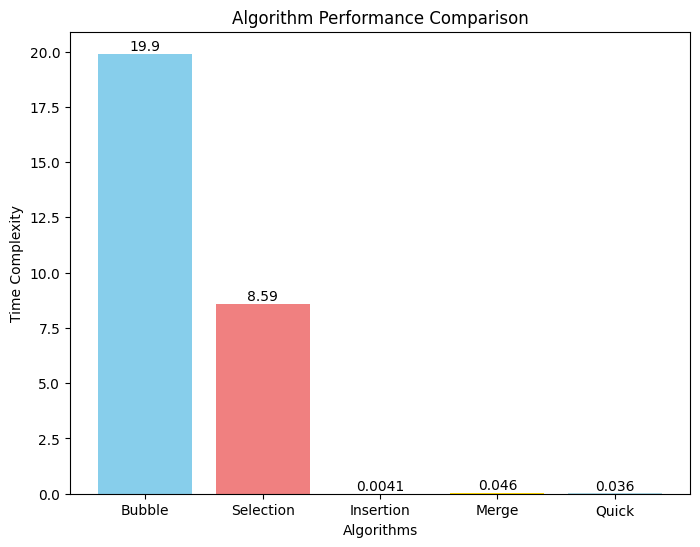

In [ ]:
# prompt: write python code to draw a color bar chart for the following values [19.9, 8.59, 0.0041, 0.046, 0.036] with label [Bubble, Selection, Insertion, Merge, Quick] and show the value on the bar

import matplotlib.pyplot as plt

def create_color_bar_chart(values, labels):
    """
    Creates a color bar chart with values displayed on the bars.

    Args:
        values: A list of numerical values for the bars.
        labels: A list of labels corresponding to the bars.
    """
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    bars = plt.bar(labels, values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightblue'])

    # Add value labels on top of each bar
    for bar, value in zip(bars, values):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(value, 4), ha='center', va='bottom')

    plt.xlabel("Algorithms")
    plt.ylabel("Time Complexity")
    plt.title("Algorithm Performance Comparison")
    plt.show()

# Example usage
values = [19.9, 8.59, 0.0041, 0.046, 0.036]
labels = ['Bubble', 'Selection', 'Insertion', 'Merge', 'Quick']

create_color_bar_chart(values, labels)

In [34]:
print("End chapter 4.")

End chapter 4.
